# Import Python Modules

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 

import json
from wordcloud import WordCloud
from matplotlib.lines import Line2D
# matplotlib.rcParams['figure.figsize']=[33,33]
from importlib import reload
import CircadianAnalysisFuncs as caf
from scipy.stats import linregress
import scipy as sc
from scipy import stats
import statsmodels.stats.multitest as smt
import json
import re
import powerlaw # pip install powerlaw

import matplotlib.gridspec as gridspec
import seaborn as sns
import networkx as nx  
from matplotlib.colors import LinearSegmentedColormap


import warnings
warnings.filterwarnings("ignore")

In [ ]:
mainRoot = os.getcwd()
mainRoot

In [ ]:
resultsDir = 'results'
moduleDir='cellbox_output_module_model'
geneDir='cellbox_output_gene_model'


In [ ]:

pipelineStatsDf = pd.DataFrame()

trialNames=['Cellbox_Module','Cellbox_Gene']
minTestLossList=[]
minValidLossList=[]
minTestSeedList=[]
minTestSubstageList=[]
minValidSeedList=[]
minValidSubstageList=[]
allTestLoss=[]
allValidLoss=[]
varianceTestLoss=[]
varianceValidLoss=[]
meanTestLoss=[]
meanValidLoss=[]
numberOfModels=[]



# Concentration and Circadian Traces of best models

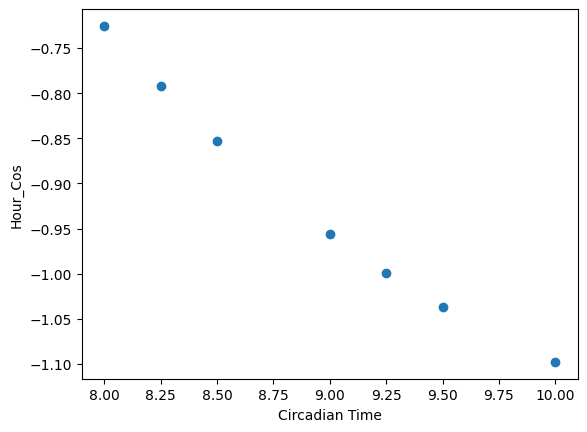

In [ ]:
reload(caf)
os.chdir(mainRoot)

trialDataFrame = caf.ProduceLossDataFrame(mainRoot,resultsDir+"/"+moduleDir)
minTestSeed,minTestSubstage,minTestLoss,minValidSeed,minValidSubstage,minValidLoss = caf.AnalyseTrialDataFrame(trialDataFrame,True)
minTestLossList.append(minTestLoss)
minValidLossList.append(minValidLoss)
minTestSeedList.append(minTestSeed)
minTestSubstageList.append(minTestSubstage)
minValidSeedList.append(minValidSeed)
minValidSubstageList.append(minValidSubstage)
allTestLoss.append(np.asfarray(trialDataFrame['test_loss'].values))
allValidLoss.append(np.asfarray(trialDataFrame['valid_loss'].values))
numberOfModels.append(len(np.asfarray(trialDataFrame['valid_loss'].values)))
meanTestLoss.append(np.mean(np.asfarray(trialDataFrame['test_loss'].values)))
meanValidLoss.append(np.mean(np.asfarray(trialDataFrame['valid_loss'].values)))
varianceTestLoss.append(np.var(np.asfarray(trialDataFrame['test_loss'].values)))
varianceValidLoss.append(np.var(np.asfarray(trialDataFrame['valid_loss'].values)))

dataDir ='Cellbox_tests/Cellbox_Module'
trialOutputDir=moduleDir
noilist=[63,98,42,73,84,81,88,104,105]
caf.plotBestModel(mainRoot,trialDataFrame,resultsDir,dataDir,trialOutputDir,minTestSeed,minTestSubstage,noilist)



LinregressResult(slope=-0.1421317728215572, intercept=2.006892391751564, rvalue=-0.9902108750411791, pvalue=1.8114743656928378e-05, stderr=0.008959833987204435, intercept_stderr=0.08021964801810512)
Range: 0.2894597907552091


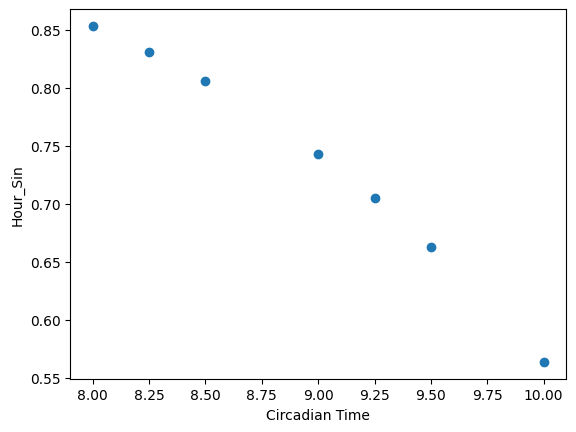

LinregressResult(slope=-0.1506850802900385, intercept=0.6062747909089744, rvalue=-0.9909728852264849, pvalue=1.479867324294821e-05, stderr=0.009116552450716433, intercept_stderr=0.08162278785293071)
Range: 0.298291270824509


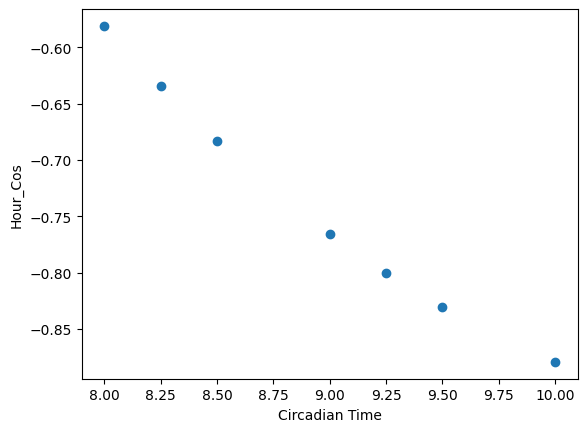

In [ ]:
reload(caf)
os.chdir(mainRoot)
# mainRoot=os.getcwd()

trialDataFrame = caf.ProduceLossDataFrame(mainRoot,resultsDir+"/"+geneDir)
minTestSeed,minTestSubstage,minTestLoss,minValidSeed,minValidSubstage,minValidLoss = caf.AnalyseTrialDataFrame(trialDataFrame,True)
minTestLossList.append(minTestLoss)
minValidLossList.append(minValidLoss)
minTestSeedList.append(minTestSeed)
minTestSubstageList.append(minTestSubstage)
minValidSeedList.append(minValidSeed)
minValidSubstageList.append(minValidSubstage)
allTestLoss.append(np.asfarray(trialDataFrame['test_loss'].values))
allValidLoss.append(np.asfarray(trialDataFrame['valid_loss'].values))
numberOfModels.append(len(np.asfarray(trialDataFrame['valid_loss'].values)))
meanTestLoss.append(np.mean(np.asfarray(trialDataFrame['test_loss'].values)))
meanValidLoss.append(np.mean(np.asfarray(trialDataFrame['valid_loss'].values)))
varianceTestLoss.append(np.var(np.asfarray(trialDataFrame['test_loss'].values)))
varianceValidLoss.append(np.var(np.asfarray(trialDataFrame['valid_loss'].values)))

dataDir ='Cellbox_tests/Cellbox_Gene'
trialOutputDir=geneDir
noilist=[63,98,42,73,84,81,88,104,105]
caf.plotBestModel(mainRoot,trialDataFrame,resultsDir,dataDir,trialOutputDir,minTestSeed,minTestSubstage,noilist)



Visualise the summary statistics of the models

In [ ]:
pipelineStatsDf = pd.DataFrame()

pipelineStatsDf['Test Names']=['Cellbox_Module','Cellbox_Module']
pipelineStatsDf['Number of Models']=numberOfModels
pipelineStatsDf['Test Loss']=minTestLossList
pipelineStatsDf['Mean Test Loss']=meanTestLoss
pipelineStatsDf['Variance Test Loss']=varianceTestLoss
pipelineStatsDf['Validation Loss']=minValidLossList
pipelineStatsDf['Mean Validation Loss']=meanValidLoss
pipelineStatsDf['Variance Validation Loss']=varianceValidLoss
pipelineStatsDf['test seed']=minTestSeedList
pipelineStatsDf['test substage']=minTestSubstageList
pipelineStatsDf['validation seed']=minValidSeedList
pipelineStatsDf['validation substage']=minValidSubstageList
display(pipelineStatsDf)

Violin plot showing the mean and variance of the cellbox machine learning loss during testing, for both the Module and Gene models.

In [ ]:
fig,ax = plt.subplots()
ax.set_ylabel('Test Loss')
ax.set_xlabel('Experiment')
ax.violinplot(allTestLoss, showmeans=True)
ax.set_xticks(np.arange(len(pipelineStatsDf['Test Names']))+1)
ax.set_xticklabels(pipelineStatsDf['Test Names'])
plt.grid()
plt.show()

Violin plot showing the mean and variance of the cellbox machine learning loss during the validation step, for both the Module and Gene models.

In [ ]:
fig,ax = plt.subplots()
ax.set_ylabel('Validation Loss')
ax.set_xlabel('Experiment')
ax.violinplot(allValidLoss, showmeans=True)
ax.set_xticks(np.arange(len(pipelineStatsDf['Test Names']))+1)
ax.set_xticklabels(pipelineStatsDf['Test Names'])
plt.grid()
plt.show()

# Produce the simulation gene networks

In [ ]:
reload(caf)

In [ ]:
os.chdir(mainRoot)
tDir = moduleDir
GN_module,statistics_TRN_known_module,statistics_TRN_module,top2_interactions_df_module,Wij_index_module,metrics_df_module,Wij = caf.FromTrialDirectoryProduceNetwork(resultsDir,tDir)


In [ ]:
os.chdir(mainRoot)
tDir = geneDir
GN_gene,statistics_TRN_known_gene,statistics_TRN_gene,top2_interactions_df_gene,Wij_index_gene,metrics_df_gene,Wij = caf.FromTrialDirectoryProduceNetwork(resultsDir,tDir)


In [ ]:
# for edge effector to target over the total complete models runs (up to 1000), 
# what is the likelihood that the edge is non zero?

# alpha = 0.05: 95% confidence in signficance, equivalent critical t-value = 1.645
# alpha = 0.01: 99% confidence in signficance, equivalent critical t-value = 2.33
# alpha = 0.001: 99.9% confidence in signficance, equivalent critical t-value = 3.09
    

In [ ]:
# subset of 99.9% significance that there is an effect and that the effect is strong by the mean threshold

In [ ]:
threshold = 0.17
subset_metrics_df_module = metrics_df_module[(metrics_df_module['t_value_abs'] > 3.09) & (metrics_df_module['mean'].abs() > threshold)]
display(subset_metrics_df_module)

In [ ]:
threshold = 0.0203
subset_metrics_df_gene = metrics_df_gene[(metrics_df_gene['t_value_abs'] > 3.09) & (metrics_df_gene['mean'].abs() > threshold)]
display(subset_metrics_df_gene)

In [ ]:
for index,row in subset_metrics_df_gene.iterrows():
    if 'SYNPCC7942_RS11860' in str(row['effector_gene']) or 'SYNPCC7942_RS11860' in str(row['target_gene']):
        print('here')
        # 'SYNPCC7942_RS11860'

In [ ]:
# overwrite some gene names
wcDict={}
wcDict["Synpcc7942_0677"]="Pex"
wcDict["Synpcc7942_0095"]="RpaA"
wcDict["Synpcc7942_1573"]="Dgh2"
wcDict["Synpcc7942_1849"]="RpoD5"
wcDict["Synpcc7942_1108"]="HimA"
wcDict["Synpcc7942_1216"]="KaiC"
wcDict["Synpcc7942_0110"]="XRE"
wcDict["Synpcc7942_1784"]="SigI"
wcDict["Synpcc7942_0599"]="TetR"
wcDict["Synpcc7942_0127"]="NtcA"
wcDict["Synpcc7942_1453"]="RpaB"
wcDict["Synpcc7942_0703"]="DprA"
wcDict["Synpcc7942_0569"]="RpoD4"
wcDict["Synpcc7942_1923"]="SigG"
wcDict["Synpcc7942_1557"]="RpoD6"
wcDict["Synpcc7942_2248"]="Hup"
wcDict["Synpcc7942_0556"]="SrrB"
wcDict["Synpcc7942_2306"]="dnaJ"
wcDict["Synpcc7942_0035"]="Synpcc7942_0035"
wcDict["Synpcc7942_0316"]="Synpcc7942_0316"
wcDict["Synpcc7942_0551"]="MMPL"
wcDict["Synpcc7942_0700"]="uspA"
wcDict["Synpcc7942_1397"]="Synpcc7942_1397"
wcDict["Synpcc7942_1464"]="somA1"
wcDict["Synpcc7942_1610"]="pntB"
wcDict["Synpcc7942_1611"]="pntA2"
wcDict["Synpcc7942_1612"]="pntA"
wcDict["Synpcc7942_1635"]="somB2"
wcDict["Synpcc7942_1656"]="katG"
wcDict["Synpcc7942_1757"]="priA"
wcDict["Synpcc7942_1976"]="ndhD1"
wcDict["Synpcc7942_2307"]="Synpcc7942_2307"
wcDict["Synpcc7942_2326"]="SIMPL"
wcDict["Synpcc7942_2333"]="opcA"
wcDict["Synpcc7942_2334"]="ZWF"
wcDict["Synpcc7942_2335"]="fbp"
wcDict["Synpcc7942_2352"]="yfiA"
wcDict["Synpcc7942_2388"]="oxdC"
wcDict["Synpcc7942_2602"]="ctaC"
wcDict["Synpcc7942_0245"]="gap1"
wcDict["Synpcc7942_0797"]="Synpcc7942_0797"
wcDict["Synpcc7942_1572"]="Synpcc7942_1572"
wcDict["Synpcc7942_2082"]="fusA"
wcDict["Synpcc7942_0162"]="Synpcc7942_0162"
wcDict["Synpcc7942_0528"]="Synpcc7942_0528"
wcDict["Synpcc7942_1235"]="narB"
wcDict["Synpcc7942_2401"]="hspA"
wcDict["Synpcc7942_0304"]="coq4"
wcDict["Synpcc7942_2556"]="hoxY"
wcDict["Synpcc7942_1218"]="KaiA"
wcDict["Synpcc7942_1217"]="KaiB"
wcDict["Synpcc7942_2125"]="Synpcc7942_2125"
wcDict["Synpcc7942_1613"]="DUF2808"
wcDict["Synpcc7942_0905"]="Synpcc7942_0905"
wcDict["Synpcc7942_1368"]=" Synpcc7942_1368"
wcDict["Synpcc7942_1338"]="DUF3747"
wcDict["Synpcc7942_2126"]="Synpcc7942_2126"
wcDict["Synpcc7942_2336"]="Synpcc7942_2336"
wcDict["Synpcc7942_0516"]="ctpB"
wcDict["Synpcc7942_2267"]="Synpcc7942_2267"
wcDict["Synpcc7942_0318"]="Synpcc7942_0318"
wcDict["Synpcc7942_2239"]="Synpcc7942_2239"
wcDict["Synpcc7942_0444"]="sek0026"




In [ ]:
locus_tag_map={}

ann = pd.read_csv("../Data/annotation/Selongatus_PCC7942_ref_tfs.csv")
for index,row in ann.iterrows():
    
    locus_tag_map[row['locus_tag']]=row['old_locus_tag']
    
    

In [ ]:
modulonGene_df=pd.read_excel('Supplementary Dataset.xlsx',sheet_name='S9_ICAresultsModulon')

In [ ]:
modulonGene_df

In [ ]:
count=0
genes=[]
for ind, row in modulonGene_df.iterrows():
#     print(row['old_locus_tag'])
    if row['old_locus_tag']== 'Synpcc7942_1849':
        print(row)
        genes.append(row['gene_name'])
        count+=1
print(count)

In [ ]:
gene_name_map = {}

for index,row in ann.iterrows():
#     print(row['old_locus_tag'])
    if 'Synpcc' in str(row['old_locus_tag']):  
        if str(row['gene_name']) != 'nan':
            gene_name_map[str(row['old_locus_tag'])] = str(row['gene_name'])
    
for i in wcDict.keys():
    if i not in gene_name_map.keys():
        gene_name_map[i] = wcDict[i]
    
for i in gene_name_map.keys():
    print(i+" : "+gene_name_map[i])
    
    
    

In [ ]:
def filter_gene_names(gene_names):
    gene_names = str(gene_names)
    parts=gene_names.split(" ")
    filtered_names = [part for part in parts if part.startswith('Synpcc')]
    
    return ''.join(filtered_names)

def filter_unique_gene_names(group):
    return group.loc[group['log2FC'].abs().idxmax()]

In [ ]:
print('Redox')
redoxProteomics_df=pd.read_excel('ProteomicsData/PPI_Se_mono_exp2_total_oxidation_fracs_filtered_uniSite_stat.xlsx',sheet_name='PPI_Se_mono_exp2_total_oxidatio')
columnsToDrop = set(redoxProteomics_df.columns) - set(['Gene.Names','Dil_D_vs_Dil_L_log2FC','Dil_D_vs_Dil_L_p_value','D_vs_L_log2FC','D_vs_L_p_value'])
redoxProteomics_df = redoxProteomics_df.drop(columns=list(columnsToDrop))
redoxProteomics_df['Gene.Names'] = redoxProteomics_df['Gene.Names'].apply(filter_gene_names)
display(redoxProteomics_df)

print('Global')
globalProteomics_df=pd.read_excel('ProteomicsData/PPI_Se_mono_exp2_global_fracs_filtered_protein_abundance_stat.xlsx',sheet_name='PPI_Se_mono_exp2_global_fracs_f')
columnsToDrop = set(globalProteomics_df.columns) - set(['Gene.Names','Dil_D_vs_Dil_L_log2FC','Dil_D_vs_Dil_L_p_value','D_vs_L_log2FC','D_vs_L_p_value'])
globalProteomics_df = globalProteomics_df.drop(columns=list(columnsToDrop))
globalProteomics_df['Gene.Names'] = globalProteomics_df['Gene.Names'].apply(filter_gene_names)
display(globalProteomics_df)

In [ ]:
pCutOff=0.05
fcCutOff=0.1
dilute_redoxProteomics_df = redoxProteomics_df[(redoxProteomics_df['Dil_D_vs_Dil_L_log2FC'] > fcCutOff) | (redoxProteomics_df['Dil_D_vs_Dil_L_log2FC'] < -fcCutOff) & (redoxProteomics_df['Dil_D_vs_Dil_L_p_value'] < pCutOff)]
dilute_redoxProteomics_df = dilute_redoxProteomics_df.drop(columns=['D_vs_L_log2FC','D_vs_L_p_value'])
dilute_redoxProteomics_df = dilute_redoxProteomics_df.rename(columns={'Dil_D_vs_Dil_L_log2FC':'log2FC','Dil_D_vs_Dil_L_p_value':'p_value'})
dilute_redoxProteomics_df = dilute_redoxProteomics_df.groupby('Gene.Names', group_keys=False, as_index=False).apply(filter_unique_gene_names)
dilute_redoxProteomics_df = dilute_redoxProteomics_df[dilute_redoxProteomics_df['Gene.Names'].str.strip() != ""]
dilute_redoxProteomics_df['Gene.Names'] = dilute_redoxProteomics_df['Gene.Names'].replace(gene_name_map)

dilute_globalProteomics_df = globalProteomics_df[(globalProteomics_df['Dil_D_vs_Dil_L_log2FC'] > fcCutOff) | (globalProteomics_df['Dil_D_vs_Dil_L_log2FC'] < -fcCutOff) & (globalProteomics_df['Dil_D_vs_Dil_L_p_value'] < pCutOff)]
dilute_globalProteomics_df = dilute_globalProteomics_df.drop(columns=['D_vs_L_log2FC','D_vs_L_p_value'])
dilute_globalProteomics_df = dilute_globalProteomics_df.rename(columns={'Dil_D_vs_Dil_L_log2FC':'log2FC','Dil_D_vs_Dil_L_p_value':'p_value'})
dilute_globalProteomics_df = dilute_globalProteomics_df.groupby('Gene.Names', group_keys=False, as_index=False).apply(filter_unique_gene_names)
dilute_globalProteomics_df = dilute_globalProteomics_df[dilute_globalProteomics_df['Gene.Names'].str.strip() != ""]
dilute_globalProteomics_df['Gene.Names'] = dilute_globalProteomics_df['Gene.Names'].replace(gene_name_map)



In [ ]:
modulonFilteredGenes={}
filterNumber=110
for i in np.unique(modulonGene_df['iModulon'].values):
    modulon_slice=[]
    name_slice=[]
    filtered_slice=[]
    print()
    print(i)
    for index,row in modulonGene_df.iterrows():   
        if row['iModulon'] == i:
            modulon_slice.append(np.abs(row['gene_weight']))
            name_slice.append(row['locus_tag'])
#     print(modulon_slice)
    
    
    try:
        topIndices = np.argpartition(modulon_slice,filterNumber)[-filterNumber:]
#         print(topIndices)
#         print(name_slice[topIndices])
        for j in topIndices:
            filtered_slice.append(name_slice[j])
        
    except:
        filtered_slice=name_slice
        
    print(filtered_slice)
    modulonFilteredGenes[i] = filtered_slice
    

['SYNPCC7942_RS01190', 'SYNPCC7942_RS14145', 'SYNPCC7942_RS03830', 'SYNPCC7942_RS03835', 'SYNPCC7942_RS03860', 'SYNPCC7942_RS03910', 'SYNPCC7942_RS04190', 'SYNPCC7942_RS13715', 'SYNPCC7942_RS04805', 'SYNPCC7942_RS05005', 'SYNPCC7942_RS05150', 'SYNPCC7942_RS05940', 'SYNPCC7942_RS13740', 'SYNPCC7942_RS06165', 'SYNPCC7942_RS06380', 'SYNPCC7942_RS06570', 'SYNPCC7942_RS07675', 'SYNPCC7942_RS07830', 'SYNPCC7942_RS07880', 'SYNPCC7942_RS14175', 'SYNPCC7942_RS13785', 'SYNPCC7942_RS10615', 'SYNPCC7942_RS10990', 'SYNPCC7942_RS11570', 'SYNPCC7942_RS11790', 'SYNPCC7942_RS12225', 'SYNPCC7942_RS12925', 'SYNPCC7942_RS13150', 'HKK26_RS00025', 'HKK26_RS00040', 'HKK26_RS00110', 'HKK26_RS00165', 'HKK26_RS00170']

29
['SYNPCC7942_RS00100', 'SYNPCC7942_RS08560', 'SYNPCC7942_RS08565', 'SYNPCC7942_RS08570', 'SYNPCC7942_RS08575', 'SYNPCC7942_RS08580', 'SYNPCC7942_RS08585', 'SYNPCC7942_RS08590', 'SYNPCC7942_RS08600', 'SYNPCC7942_RS08605', 'SYNPCC7942_RS14045', 'SYNPCC7942_RS08765', 'SYNPCC7942_RS12445', 'HKK26_

['SYNPCC7942_RS00645', 'SYNPCC7942_RS00860', 'SYNPCC7942_RS01545', 'SYNPCC7942_RS01745', 'SYNPCC7942_RS01860', 'SYNPCC7942_RS13915', 'SYNPCC7942_RS02895', 'SYNPCC7942_RS03140', 'SYNPCC7942_RS04315', 'SYNPCC7942_RS04335', 'SYNPCC7942_RS04340', 'SYNPCC7942_RS04345', 'SYNPCC7942_RS04350', 'SYNPCC7942_RS04590', 'SYNPCC7942_RS04640', 'SYNPCC7942_RS04805', 'SYNPCC7942_RS05300', 'SYNPCC7942_RS05305', 'SYNPCC7942_RS05320', 'SYNPCC7942_RS05335', 'SYNPCC7942_RS06350', 'SYNPCC7942_RS06355', 'SYNPCC7942_RS06360', 'SYNPCC7942_RS06425', 'SYNPCC7942_RS07860', 'SYNPCC7942_RS07945', 'SYNPCC7942_RS08685', 'SYNPCC7942_RS08715', 'SYNPCC7942_RS08720', 'SYNPCC7942_RS08880', 'SYNPCC7942_RS08965', 'SYNPCC7942_RS09130', 'SYNPCC7942_RS09360', 'SYNPCC7942_RS09700', 'SYNPCC7942_RS10680', 'SYNPCC7942_RS10955', 'SYNPCC7942_RS11585', 'SYNPCC7942_RS12290', 'SYNPCC7942_RS12535', 'SYNPCC7942_RS12840']

53
['SYNPCC7942_RS13700', 'SYNPCC7942_RS14170', 'HKK26_RS00025', 'HTX97_RS00025']

54
['SYNPCC7942_RS04300', 'SYNPCC79

In [ ]:
modulonAverageGeneWeight={}
for i in np.unique(modulonGene_df['iModulon'].values):
    modulon_slice=[]
    print()
    print(i)
    for index,row in modulonGene_df.iterrows():   
        if row['iModulon'] == i:
            modulon_slice.append(row['gene_weight'])
    print(modulon_slice)
    modulonAverageGeneWeight[i] = np.mean(modulon_slice)

In [ ]:
protein_mean_original={}
protein_mean_module={}
for index,row in subset_metrics_df_module.iterrows():
    eff = row['effector']
    tar = row['target']
    
    if eff not in protein_mean_original.keys():
        protein_mean_original[eff] = row['mean']
    elif abs(protein_mean_original[eff]) < abs(row['mean']):
        protein_mean_original[eff] = row['mean']
        
    if tar not in protein_mean_original.keys():
        protein_mean_original[tar] = row['mean']
    elif abs(protein_mean_original[tar]) < abs(row['mean']):
        protein_mean_original[tar] = row['mean']

# print(protein_mean_original)
for key in protein_mean_original.keys():
    print(key)
print()
modulonKeys=[]
for key in protein_mean_original.keys():
    if 'SYNPCC' not in key and 'Light' not in key:
        modulonKeys.append(key)

for index,row in modulonGene_df.iterrows():        
    tfname = row['locus_tag']
    modulon = row['iModulon']
    if str(modulon) in modulonKeys:
        protein_mean_original[tfname] = protein_mean_original[str(modulon)]
# print(protein_mean_original)
for key in protein_mean_original.keys():
    print(key)
print()
for key in modulonKeys:
    protein_mean_original.pop(key)

In [ ]:
protein_mean_original={}
protein_mean_module={}
for index,row in subset_metrics_df_module.iterrows():
    eff = row['effector']
    tar = row['target']
    
    if eff not in protein_mean_original.keys():
        protein_mean_original[eff] = row['mean']
    elif abs(protein_mean_original[eff]) < abs(row['mean']):
        protein_mean_original[eff] = row['mean']
        
    if tar not in protein_mean_original.keys():
        protein_mean_original[tar] = row['mean']
    elif abs(protein_mean_original[tar]) < abs(row['mean']):
        protein_mean_original[tar] = row['mean']
# print(protein_mean_original)
for key in protein_mean_original.keys():
    print(key)
print()


In [ ]:
filter_absolute_modulons ={'1': 0.2432418438162359,
 '6': 0.21843671107289772,
 '7': 0.19395270821389263,
 '8': 0.20301612933571336,
 '9': 0.20943789653284556,
 '20': 0.1729084026548205,
 '21': 0.19297855501990852,
 '27': 0.21019834712354762,
 '30': 0.1905674769093069,
 '32': 0.20109287158361167,
 '38': 0.2871823755570419,
 '44': 0.19803969434899452,
 '45': 0.20953983269633122,
 '50': 0.4277176684686494,
 '52': 0.2175473774271941,
 '57': 0.17464708986235505,
 '58': 0.1721656195094189,
 '59': 0.23009836849906157,
 '62': 0.17818807781238127}

print("Top 5 abolute value modules: ",sorted(filter_absolute_modulons,key=filter_absolute_modulons.get, reverse=True)[:5])


In [ ]:
protein_mean_original={}
protein_mean_module={}
for index,row in subset_metrics_df_module.iterrows():
    eff = row['effector']
    tar = row['target']
    
    if eff not in protein_mean_original.keys():
        protein_mean_original[eff] = row['mean']
    elif abs(protein_mean_original[eff]) < abs(row['mean']):
        protein_mean_original[eff] = row['mean']
        
    if tar not in protein_mean_original.keys():
        protein_mean_original[tar] = row['mean']
    elif abs(protein_mean_original[tar]) < abs(row['mean']):
        protein_mean_original[tar] = row['mean']
# print(protein_mean_original)
for key in protein_mean_original.keys():
    print(key)
print()



modulonKeys=[]
for key in protein_mean_original.keys():
    if 'SYNPCC' not in key and 'Light' not in key:
        modulonKeys.append(key)
# override

modulonKeys=['6'] #['50', '38', '59', '6', '27']

for index,row in modulonGene_df.iterrows():        
    tfname = row['locus_tag']
    modulon = row['iModulon']
    if str(modulon) in modulonKeys and tfname in modulonFilteredGenes[modulon]:
        protein_mean_original[tfname] = protein_mean_original[str(modulon)]
# print(protein_mean_original)
for key in protein_mean_original.keys():
    print(key)
print()
for key in modulonKeys:
    protein_mean_original.pop(key)

for protein in protein_mean_original:
    
    newkey=protein
    
    if "TF_" in protein:
        newkey = protein.replace("TF_","")
    try:
        protein_mean_module[gene_name_map[locus_tag_map[newkey]]]=protein_mean_original[protein]
    except:
        if newkey =="SYNPCC7942_RS04430":
            protein_mean_module['CheA']=protein_mean_original[protein]
            
        elif newkey =="SYNPCC7942_RS12500":
            protein_mean_module['Q31KD0']=protein_mean_original[protein]
        elif newkey =="SYNPCC7942_RS06905":
            protein_mean_module['Q31NI8']=protein_mean_original[protein]
        else:
            protein_mean_module[newkey]=protein_mean_original[protein]
    
    
protein_mean_original={}
protein_mean_gene={}
for index,row in subset_metrics_df_gene.iterrows():
    eff = row['effector']
    tar = row['target']
    
    if eff not in protein_mean_original.keys():
        protein_mean_original[eff] = row['mean']
    elif abs(protein_mean_original[eff]) < abs(row['mean']):
        protein_mean_original[eff] = row['mean']
        
    if tar not in protein_mean_original.keys():
        protein_mean_original[tar] = row['mean']
    elif abs(protein_mean_original[tar]) < abs(row['mean']):
        protein_mean_original[tar] = row['mean']
    

for protein in protein_mean_original:
    
    newkey=protein
    if "TF_" in protein:
        newkey = protein.replace("TF_","")
    try:
        protein_mean_gene[gene_name_map[locus_tag_map[newkey]]]=protein_mean_original[protein]
    except:
        if newkey =="SYNPCC7942_RS04430":
            protein_mean_gene['CheA']=protein_mean_original[protein]
            
        elif newkey =="SYNPCC7942_RS12500":
            protein_mean_gene['Q31KD0']=protein_mean_original[protein]
        elif newkey =="SYNPCC7942_RS06905":
            protein_mean_gene['Q31NI8']=protein_mean_original[protein]
        else:
            protein_mean_gene[newkey]=protein_mean_original[protein]
    
        
    
    

In [ ]:
# protein_mean_global={}
# for gene in dfExperimentGlobal[0].values.tolist():
#     if gene in gene_name_map.keys():
#         if gene_name_map[gene] in protein_mean_module or  gene_name_map[gene] in protein_mean_gene:
#             protein_mean_global[gene_name_map[gene]] = 1.5
# #     else:
# #         protein_mean_global[gene] = 1.0
        
# protein_mean_ptm={}
# for gene in dfExperimentPTM[0].values.tolist():
#     if gene in gene_name_map.keys():
#         if gene_name_map[gene] in protein_mean_module or gene_name_map[gene] in protein_mean_gene:
#             protein_mean_ptm[gene_name_map[gene]] = 2.0
# #     else:
# #         protein_mean_ptm[gene] = 2.0

In [ ]:
def PlotTF(ouput_filename):    
    
    protein_mean_original={}
    protein_mean_module={}
    for index,row in subset_metrics_df_module.iterrows():
        eff = row['effector']
        tar = row['target']

        if eff not in protein_mean_original.keys():
            protein_mean_original[eff] = row['mean']
        elif abs(protein_mean_original[eff]) < abs(row['mean']):
            protein_mean_original[eff] = row['mean']

        if tar not in protein_mean_original.keys():
            protein_mean_original[tar] = row['mean']
        elif abs(protein_mean_original[tar]) < abs(row['mean']):
            protein_mean_original[tar] = row['mean']

    modulonKeys=[]
    for key in protein_mean_original.keys():
        if 'SYNPCC' not in key and 'Light' not in key:
            modulonKeys.append(key)
    # override

#     modulonKeys=['6'] #['50', '38', '59', '6', '27']

#     for index,row in modulonGene_df.iterrows():        
#         tfname = row['locus_tag']
#         modulon = row['iModulon']
#         if str(modulon) in modulonKeys and tfname in modulonFilteredGenes[modulon]:
#             protein_mean_original[tfname] = protein_mean_original[str(modulon)]
#     # print(protein_mean_original)
#     for key in protein_mean_original.keys():
#         print(key)
#     print()
    for key in modulonKeys:
        protein_mean_original.pop(key)

    for protein in protein_mean_original:

        newkey=protein

        if "TF_" in protein:
            newkey = protein.replace("TF_","")
        try:
            protein_mean_module[gene_name_map[locus_tag_map[newkey]]]=protein_mean_original[protein]
        except:
            if newkey =="SYNPCC7942_RS04430":
                newkey = 'CheA'
            elif newkey =="SYNPCC7942_RS12500":
                newkey='Q31KD0'
            elif newkey =="SYNPCC7942_RS06905":
                newkey='Q31NI8'

            protein_mean_module[newkey]=protein_mean_original[protein]


    protein_mean_original={}
    protein_mean_gene={}
    for index,row in subset_metrics_df_gene.iterrows():
        eff = row['effector']
        tar = row['target']

        if eff not in protein_mean_original.keys():
            protein_mean_original[eff] = row['mean']
        elif abs(protein_mean_original[eff]) < abs(row['mean']):
            protein_mean_original[eff] = row['mean']

        if tar not in protein_mean_original.keys():
            protein_mean_original[tar] = row['mean']
        elif abs(protein_mean_original[tar]) < abs(row['mean']):
            protein_mean_original[tar] = row['mean']


    for protein in protein_mean_original:

        newkey=protein
        if "TF_" in protein:
            newkey = protein.replace("TF_","")
        try:
            protein_mean_gene[gene_name_map[locus_tag_map[newkey]]]=protein_mean_original[protein]
        except:
            if newkey =="SYNPCC7942_RS04430":
                newkey = 'CheA'
            elif newkey =="SYNPCC7942_RS12500":
                newkey='Q31KD0'
            elif newkey =="SYNPCC7942_RS06905":
                newkey='Q31NI8'
                    
            protein_mean_gene[newkey]=protein_mean_original[protein]
    
    # pop gene dict if not in modulon list
    popKeys = list(protein_mean_gene.keys())
    for key in popKeys:
        if key not in protein_mean_module.keys():
            protein_mean_gene.pop(key)
    
    
    fig, ax = plt.subplots(figsize=(30,10))


    keys = list(protein_mean_module.keys())  
    values = np.abs(list(protein_mean_module.values()))

    plt.ylim(0.0,1.5)

    plt.scatter(keys, values, marker='x', s=150, color='#377EB8', label="iModule model")

    for key,value in protein_mean_module.items():
        plt.text(key, np.abs(value)+len(key)*0.04+0.09, str(key+"  "), ha='center', va='top',fontsize=20,color='black', rotation=90)


    # plt.yticks()
    # plt.xticks([])
    # plt.xlabel('Transcription Factor or Modulon')
    # plt.ylabel('Average Interaction Strength')
    # plt.grid(False)
    # plt.show()


    keys = list(protein_mean_gene.keys())  
    values = np.abs(list(protein_mean_gene.values()))
    # plt.figure(figsize=(8,8))
    plt.scatter(keys, values, marker='o', s=150, color='#D95F02', label="Gene model")

#     for key,value in protein_mean_gene.items():
#         plt.text(key, value, str(key+"  "), ha='center', va='top',fontsize=10,color='black', rotation=90)


    # plt.ylim(np.min(values)*1.2,np.max(values)*1.2)


    xticks_list = [label.get_text() for label in ax.get_xticklabels()]
    plt.yticks(fontsize=15)
    plt.xticks()
    ax.set_xticklabels([])
    plt.xlabel('Transcription Factor or Modulon Number',fontsize=20)
    plt.ylabel('Average Interaction Strength',fontsize=20)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.legend(fontsize=20, loc='center left',bbox_to_anchor=(1,0.5))
    plt.savefig(ouput_filename+'_model.pdf',format='pdf',bbox_inches='tight')
    plt.show()
    
    pCutOff=0.05
    fcCutOff=0.1
    dilute_redoxProteomics_df = redoxProteomics_df[(redoxProteomics_df['Dil_D_vs_Dil_L_log2FC'] > fcCutOff) | (redoxProteomics_df['Dil_D_vs_Dil_L_log2FC'] < -fcCutOff) & (redoxProteomics_df['Dil_D_vs_Dil_L_p_value'] < pCutOff)]
    dilute_redoxProteomics_df = dilute_redoxProteomics_df.drop(columns=['D_vs_L_log2FC','D_vs_L_p_value'])
    dilute_redoxProteomics_df = dilute_redoxProteomics_df.rename(columns={'Dil_D_vs_Dil_L_log2FC':'log2FC','Dil_D_vs_Dil_L_p_value':'p_value'})
    dilute_redoxProteomics_df = dilute_redoxProteomics_df.groupby('Gene.Names', group_keys=False, as_index=False).apply(filter_unique_gene_names)
    dilute_redoxProteomics_df = dilute_redoxProteomics_df[dilute_redoxProteomics_df['Gene.Names'].str.strip() != ""]
    dilute_redoxProteomics_df['Gene.Names'] = dilute_redoxProteomics_df['Gene.Names'].replace(gene_name_map)
    display(dilute_redoxProteomics_df)
    dilute_globalProteomics_df = globalProteomics_df[(globalProteomics_df['Dil_D_vs_Dil_L_log2FC'] > fcCutOff) | (globalProteomics_df['Dil_D_vs_Dil_L_log2FC'] < -fcCutOff) & (globalProteomics_df['Dil_D_vs_Dil_L_p_value'] < pCutOff)]
    dilute_globalProteomics_df = dilute_globalProteomics_df.drop(columns=['D_vs_L_log2FC','D_vs_L_p_value'])
    dilute_globalProteomics_df = dilute_globalProteomics_df.rename(columns={'Dil_D_vs_Dil_L_log2FC':'log2FC','Dil_D_vs_Dil_L_p_value':'p_value'})
    dilute_globalProteomics_df = dilute_globalProteomics_df.groupby('Gene.Names', group_keys=False, as_index=False).apply(filter_unique_gene_names)
    dilute_globalProteomics_df = dilute_globalProteomics_df[dilute_globalProteomics_df['Gene.Names'].str.strip() != ""]
    dilute_globalProteomics_df['Gene.Names'] = dilute_globalProteomics_df['Gene.Names'].replace(gene_name_map)

    
    dilute_globalProteomics_df['Gene.Names'] = dilute_globalProteomics_df['Gene.Names'].map(lambda x: x.rsplit('_',1)[-1] if '_' in x else x)  
    dilute_redoxProteomics_df['Gene.Names'] = dilute_globalProteomics_df['Gene.Names'].map(lambda x: x.rsplit('_',1)[-1] if '_' in x else x) 
    
    diluteGlobal_logFC = dilute_globalProteomics_df[dilute_globalProteomics_df['Gene.Names'].isin(xticks_list)]
    diluteGlobal_logFC['Gene.Names'] = pd.Categorical(diluteGlobal_logFC['Gene.Names'],categories = xticks_list, ordered=True)
    diluteGlobal_logFC =diluteGlobal_logFC.sort_values('Gene.Names')
    diluteGlobal_logFC = diluteGlobal_logFC.drop(columns=['p_value'])
    diluteGlobal_logFC = reindex_and_fill(diluteGlobal_logFC,xticks_list)

    diluteRedox_logFC = dilute_redoxProteomics_df[dilute_redoxProteomics_df['Gene.Names'].isin(xticks_list)]
    diluteRedox_logFC['Gene.Names'] = pd.Categorical(diluteRedox_logFC['Gene.Names'],categories = xticks_list, ordered=True)
    diluteRedox_logFC =diluteRedox_logFC.sort_values('Gene.Names')
    diluteRedox_logFC = diluteRedox_logFC.drop(columns=['p_value'])
    diluteRedox_logFC = reindex_and_fill(diluteRedox_logFC,xticks_list)

    combined_log2FC_df = pd.concat([diluteGlobal_logFC,diluteRedox_logFC], axis=1)
    combined_log2FC_df.columns = ['Abundance','Redox']
#     combined_log2FC_df.index = combined_log2FC_df.index .map(lambda x: x.rsplit('_',1)[-1])    

    print(xticks_list)
    
    colors = [
        (0.0,0.0,0.5),
        (0.0,0.0,1.0),
        (1.0,1.0,1.0),
        (1.0,0.0,0.0),
        (0.5,0.0,0.0) 
    ]
    custom_cmap = LinearSegmentedColormap.from_list('CustomMap',colors,N=256)

    plt.figure(figsize=(30,6))
    ax= sns.heatmap(combined_log2FC_df.T, cmap=custom_cmap,annot=False,
                xticklabels=xticks_list, yticklabels=combined_log2FC_df.columns,center=0,
                linewidths=0.01)



    plt.yticks(rotation=0, ha='right',fontsize=20)
    plt.xticks(rotation=90, ha='right',fontsize=20)
    
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20)
    colorbar.set_label('log2FC',fontsize=20)
    plt.subplots_adjust(bottom=0.5)
    plt.xlabel('Gene names',fontsize=20)
    plt.ylabel('Condition',fontsize=20, rotation=90)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.savefig(ouput_filename+'_proteomics.pdf',format='pdf',bbox_inches='tight')
    plt.show()

In [ ]:
# diluteGlobal_logFC = dilute_globalProteomics_df[dilute_globalProteomics_df['Gene.Names'].isin(xticks_list)]
# diluteGlobal_logFC['Gene.Names'] = pd.Categorical(diluteGlobal_logFC['Gene.Names'],categories = xticks_list, ordered=True)
# diluteGlobal_logFC =diluteGlobal_logFC.sort_values('Gene.Names')
# diluteGlobal_logFC = diluteGlobal_logFC.drop(columns=['p_value'])
# diluteGlobal_logFC = reindex_and_fill(diluteGlobal_logFC,xticks_list)

# diluteRedox_logFC = dilute_redoxProteomics_df[dilute_redoxProteomics_df['Gene.Names'].isin(xticks_list)]
# diluteRedox_logFC['Gene.Names'] = pd.Categorical(diluteRedox_logFC['Gene.Names'],categories = xticks_list, ordered=True)
# diluteRedox_logFC =diluteRedox_logFC.sort_values('Gene.Names')
# diluteRedox_logFC = diluteRedox_logFC.drop(columns=['p_value'])
# diluteRedox_logFC = reindex_and_fill(diluteRedox_logFC,xticks_list)

# combined_log2FC_df = pd.concat([denseGlobal_logFC,diluteGlobal_logFC,denseRedox_logFC,diluteRedox_logFC], axis=1)
# combined_log2FC_df.columns = ['Global','Redox']

# display(combined_log2FC_df)

In [ ]:
# combined_log2FC_df.index = combined_log2FC_df.index .map(lambda x: x.rsplit('_',1)[-1])

In [ ]:
def reindex_and_fill(df,labels):
    df = df.drop_duplicates(subset='Gene.Names',keep='first')
    df = df.set_index('Gene.Names').reindex(labels).fillna(0)
    return df

In [ ]:
def PlotModulon(ouput_filename,moduleNumber):    
    
    protein_mean_original_full={}
    protein_mean_original={}
    protein_mean_module={}
    for index,row in subset_metrics_df_module.iterrows():
        eff = row['effector']
        tar = row['target']

        if eff not in protein_mean_original_full.keys():
            protein_mean_original_full[eff] = row['mean']
        elif abs(protein_mean_original_full[eff]) < abs(row['mean']):
            protein_mean_original_full[eff] = row['mean']

        if tar not in protein_mean_original_full.keys():
            protein_mean_original_full[tar] = row['mean']
        elif abs(protein_mean_original_full[tar]) < abs(row['mean']):
            protein_mean_original_full[tar] = row['mean']

#     modulonKeys=[]
#     for key in protein_mean_original.keys():
#         if 'SYNPCC' not in key and 'Light' not in key:
#             modulonKeys.append(key)
    # override

    modulonKeys=[moduleNumber] #['50', '38', '59', '6', '27']

    for index,row in modulonGene_df.iterrows():        
        tfname = row['locus_tag']
        modulon = row['iModulon']
        if str(modulon) in modulonKeys and tfname in modulonFilteredGenes[modulon]:
            protein_mean_original[tfname] = protein_mean_original_full[str(modulon)]

#     for key in modulonKeys:
#         protein_mean_original.pop(key)

    for protein in protein_mean_original:

        newkey=protein

        if "TF_" in protein:
            newkey = protein.replace("TF_","")
        try:
            protein_mean_module[gene_name_map[locus_tag_map[newkey]]]=protein_mean_original[protein]
        except:
            if newkey =="SYNPCC7942_RS04430":
                newkey = 'CheA'
            elif newkey =="SYNPCC7942_RS12500":
                newkey='Q31KD0'
            elif newkey =="SYNPCC7942_RS06905":
                newkey='Q31NI8'

            protein_mean_module[newkey]=protein_mean_original[protein]


    protein_mean_original={}
    protein_mean_gene={}
    for index,row in subset_metrics_df_gene.iterrows():
        eff = row['effector']
        tar = row['target']

        if eff not in protein_mean_original.keys():
            protein_mean_original[eff] = row['mean']
        elif abs(protein_mean_original[eff]) < abs(row['mean']):
            protein_mean_original[eff] = row['mean']

        if tar not in protein_mean_original.keys():
            protein_mean_original[tar] = row['mean']
        elif abs(protein_mean_original[tar]) < abs(row['mean']):
            protein_mean_original[tar] = row['mean']


    for protein in protein_mean_original:

        newkey=protein
        if "TF_" in protein:
            newkey = protein.replace("TF_","")
        try:
            protein_mean_gene[gene_name_map[locus_tag_map[newkey]]]=protein_mean_original[protein]
        except:
            if newkey =="SYNPCC7942_RS04430":
                newkey = 'CheA'
            elif newkey =="SYNPCC7942_RS12500":
                newkey='Q31KD0'
            elif newkey =="SYNPCC7942_RS06905":
                newkey='Q31NI8'
                    
            protein_mean_gene[newkey]=protein_mean_original[protein]
    
    # pop gene dict if not in modulon list
    popKeys = list(protein_mean_gene.keys())
    for key in popKeys:
        if key not in protein_mean_module.keys():
            protein_mean_gene.pop(key)
            
    protein_mean_module ={(key.rsplit('_',1)[-1] if '_' in key else key):value
                         for key, value in protein_mean_module.items()}
    protein_mean_gene ={(key.rsplit('_',1)[-1] if '_' in key else key):value
                         for key, value in protein_mean_gene.items()}
    
    
    fig, ax = plt.subplots(figsize=(30,10))


    keys = list(protein_mean_module.keys())  
    values = np.abs(list(protein_mean_module.values()))

    plt.ylim(0.0,1.0)

    plt.scatter(keys, values, marker='x', s=150, color='#377EB8', label="iModule model")

    for key,value in protein_mean_module.items():
        plt.text(key, np.abs(value)+len(key)*0.04+0.05, str(key+"  "), ha='center', va='top',fontsize=15,color='black', rotation=90)

    keys = list(protein_mean_gene.keys())  
    values = np.abs(list(protein_mean_gene.values()))
    plt.scatter(keys, values, marker='o', s=150, color='#D95F02', label="Gene model")



    xticks_list = [label.get_text() for label in ax.get_xticklabels()]
    plt.yticks(fontsize=15)
    plt.xticks()
    ax.set_xticklabels([])
    plt.xlabel('Transcription Factor or Modulon Number',fontsize=20)
    plt.ylabel('Average Interaction Strength',fontsize=20)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.legend(fontsize=20, loc='center left',bbox_to_anchor=(1,0.5))
    plt.savefig(ouput_filename+'_model.pdf',format='pdf',bbox_inches='tight')
    plt.show()

    pCutOff=0.05
    fcCutOff=0.1
    dilute_redoxProteomics_df = redoxProteomics_df[(redoxProteomics_df['Dil_D_vs_Dil_L_log2FC'] > fcCutOff) | (redoxProteomics_df['Dil_D_vs_Dil_L_log2FC'] < -fcCutOff) & (redoxProteomics_df['Dil_D_vs_Dil_L_p_value'] < pCutOff)]
    dilute_redoxProteomics_df = dilute_redoxProteomics_df.drop(columns=['D_vs_L_log2FC','D_vs_L_p_value'])
    dilute_redoxProteomics_df = dilute_redoxProteomics_df.rename(columns={'Dil_D_vs_Dil_L_log2FC':'log2FC','Dil_D_vs_Dil_L_p_value':'p_value'})
    dilute_redoxProteomics_df = dilute_redoxProteomics_df.groupby('Gene.Names', group_keys=False, as_index=False).apply(filter_unique_gene_names)
    dilute_redoxProteomics_df = dilute_redoxProteomics_df[dilute_redoxProteomics_df['Gene.Names'].str.strip() != ""]
    dilute_redoxProteomics_df['Gene.Names'] = dilute_redoxProteomics_df['Gene.Names'].replace(gene_name_map)

    dilute_globalProteomics_df = globalProteomics_df[(globalProteomics_df['Dil_D_vs_Dil_L_log2FC'] > fcCutOff) | (globalProteomics_df['Dil_D_vs_Dil_L_log2FC'] < -fcCutOff) & (globalProteomics_df['Dil_D_vs_Dil_L_p_value'] < pCutOff)]
    dilute_globalProteomics_df = dilute_globalProteomics_df.drop(columns=['D_vs_L_log2FC','D_vs_L_p_value'])
    dilute_globalProteomics_df = dilute_globalProteomics_df.rename(columns={'Dil_D_vs_Dil_L_log2FC':'log2FC','Dil_D_vs_Dil_L_p_value':'p_value'})
    dilute_globalProteomics_df = dilute_globalProteomics_df.groupby('Gene.Names', group_keys=False, as_index=False).apply(filter_unique_gene_names)
    dilute_globalProteomics_df = dilute_globalProteomics_df[dilute_globalProteomics_df['Gene.Names'].str.strip() != ""]
    dilute_globalProteomics_df['Gene.Names'] = dilute_globalProteomics_df['Gene.Names'].replace(gene_name_map)
    
    dilute_globalProteomics_df['Gene.Names'] = dilute_globalProteomics_df['Gene.Names'].map(lambda x: x.rsplit('_',1)[-1] if '_' in x else x)  
    dilute_redoxProteomics_df['Gene.Names'] = dilute_redoxProteomics_df['Gene.Names'].map(lambda x: x.rsplit('_',1)[-1] if '_' in x else x)  
    
    diluteGlobal_logFC = dilute_globalProteomics_df[dilute_globalProteomics_df['Gene.Names'].isin(xticks_list)]
   
    diluteGlobal_logFC['Gene.Names'] = pd.Categorical(diluteGlobal_logFC['Gene.Names'],categories = xticks_list, ordered=True)
    diluteGlobal_logFC =diluteGlobal_logFC.sort_values('Gene.Names')
    diluteGlobal_logFC = diluteGlobal_logFC.drop(columns=['p_value'])
    
    diluteGlobal_logFC = reindex_and_fill(diluteGlobal_logFC,xticks_list)

    diluteRedox_logFC = dilute_redoxProteomics_df[dilute_redoxProteomics_df['Gene.Names'].isin(xticks_list)]
    diluteRedox_logFC['Gene.Names'] = pd.Categorical(diluteRedox_logFC['Gene.Names'],categories = xticks_list, ordered=True)
    diluteRedox_logFC =diluteRedox_logFC.sort_values('Gene.Names')
    diluteRedox_logFC = diluteRedox_logFC.drop(columns=['p_value'])
    diluteRedox_logFC = reindex_and_fill(diluteRedox_logFC,xticks_list)

    combined_log2FC_df = pd.concat([diluteGlobal_logFC,diluteRedox_logFC], axis=1)
    combined_log2FC_df.columns = ['Abundance','Redox']
#     combined_log2FC_df.index = combined_log2FC_df.index .map(lambda x: x.rsplit('_',1)[-1])    


    colors = [
        (0.0,0.0,0.5),
        (0.0,0.0,1.0),
        (1.0,1.0,1.0),
        (1.0,0.0,0.0),
        (0.5,0.0,0.0) 
    ]
    custom_cmap = LinearSegmentedColormap.from_list('CustomMap',colors,N=256)

    plt.figure(figsize=(30,6))
    ax= sns.heatmap(combined_log2FC_df.T, cmap=custom_cmap,annot=False,
                xticklabels=xticks_list, yticklabels=combined_log2FC_df.columns,center=0,
                linewidths=0.01)



    plt.yticks(rotation=0, ha='right',fontsize=20)
    plt.xticks(rotation=90, ha='right',fontsize=15)
    
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20)
    colorbar.set_label('log2FC',fontsize=20)
    plt.subplots_adjust(bottom=0.5)
    plt.xlabel('Gene names',fontsize=20)
    plt.ylabel('Condition',fontsize=20, rotation=90)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.savefig(ouput_filename+'_proteomics.pdf',format='pdf',bbox_inches='tight')
    plt.show()

In [ ]:
PlotTF('TF')

In [ ]:
PlotModulon('modulon_50','50')

In [ ]:
PlotModulon('modulon_38','38')

In [ ]:
PlotModulon('modulon_6','6')

In [ ]:
PlotModulon('modulon_27','27')

In [ ]:
columnsToDrop=["Protein","mapped_name","has_annotation_match", "missing_with_match", "missing_without_match", "double_hit", "match_hit", "percent_id", "coverage", "drop_proteins", "subset_proteins", "rename_proteins"]
annotation_mapping_df = pd.read_csv("../Data/annotation/annotation_mapping.csv").drop(columns=list(columnsToDrop))
annotation_mapping_df['refseq_locus'] = annotation_mapping_df['refseq_locus'].str.replace('SYNPCC7942_','',regex=False)
annotation_mapping_df['refseq_locus'] = annotation_mapping_df['refseq_locus'].str.replace('HTX97_','',regex=False)
annotation_mapping_df['refseq_locus'] = annotation_mapping_df['refseq_locus'].fillna(annotation_mapping_df['Entry'])


annotation_mapping_df = annotation_mapping_df.rename(columns={'refseq_locus':'mapped_name'})
annotation_mapping_df['mapped_name'] = annotation_mapping_df['genbank_locus'].map(gene_name_map).fillna(annotation_mapping_df['mapped_name'])
annotation_mapping_df = annotation_mapping_df.drop(columns=['genbank_locus'])

display(annotation_mapping_df)

In [ ]:
uniprot_map_dict = (annotation_mapping_df.set_index('Entry')['mapped_name'].to_dict())

In [ ]:
# columnsToKeep=['UniProt', 'id','LD_0/C_0',
# 'LD_0/C_0_pval','LD_2/C_2', 'LD_2/C_2_pval',
# 'LD_4/C_4', 'LD_4/C_4_pval', 
# 'LD_8/C_8', 'LD_8/C_8_pval', 'C_4/C_2',
# 'C_4/C_2_pval', 'C_8/C_2', 'C_8/C_2_pval', 'LD_4/LD_2', 'LD_4/LD_2_pval',
# 'LD_8/LD_2', 'LD_8/LD_2_pval']
columnsToKeep=['UniProt', 'id','LD_0/C_0',
'LD_0/C_0_pval','LD_2/C_2', 'LD_2/C_2_pval',
'LD_4/C_4', 'LD_4/C_4_pval', 
'LD_8/C_8', 'LD_8/C_8_pval']

print('Abundance')
abundanceProteomics_df=pd.read_csv('ProteomicsData/PPI_cyano_circadian_protein_abundance.csv')
abundanceProteomics_df = abundanceProteomics_df[columnsToKeep]

display(abundanceProteomics_df)

print('Redox')
redoxProteomics_df=pd.read_csv('ProteomicsData/PPI_cyano_circadian_redox_ptm.csv')
redoxProteomics_df = redoxProteomics_df[columnsToKeep]

display(redoxProteomics_df)

In [ ]:
fullExperimentUniProt = list(abundanceProteomics_df['UniProt'].unique()) + list(redoxProteomics_df['UniProt'].unique())
# redoxProteomics_df
fullExperimentUniProt=sorted(list(set(fullExperimentUniProt)))
print(fullExperimentUniProt)

In [ ]:
# def reindex_and_fill_2(df,labels):
#     df = df.drop_duplicates(subset='Name',keep='first')
#     df = df.set_index('Name').reindex(labels).fillna(0)
#     return df
def reindex_and_fill_2(df):
    df = df.drop_duplicates(subset='Name',keep='first')
    df = df.set_index('Name').fillna(0)
    return df

In [ ]:
# split into test dataframes
coreColumnsToKeep=['UniProt', 'id']
abundanceProteomicsDataframes =[]
# abundanceProteomicsDataframesNames =['LD_0/C_0','LD_2/C_2','LD_4/C_4','LD_8/C_8','C_4/C_2','C_8/C_2','LD_4/LD_2','LD_8/LD_2']
abundanceProteomicsDataframesNames =['LD_0/C_0','LD_2/C_2','LD_4/C_4','LD_8/C_8']

for name in abundanceProteomicsDataframesNames:
    
    nameDf = abundanceProteomics_df[coreColumnsToKeep+[name,name+'_pval']].dropna()
    
    nameDf = nameDf.rename(columns={name:'log2FC',name+'_pval':'p_value'})
    nameDf = nameDf[((nameDf['log2FC']>fcCutOff)|(nameDf['log2FC']<-fcCutOff))&(nameDf['p_value']<pCutOff)]
    
    keep_idx = nameDf.groupby('UniProt')['log2FC'].apply(lambda s: s.abs().idxmax())
    nameDf = nameDf.loc[keep_idx].reset_index(drop=True)
    
    print(nameDf['UniProt'].is_unique)
    
    nameDf = nameDf.drop(columns=['p_value','id'])

    nameDf["UniProt"] = nameDf["UniProt"].replace(uniprot_map_dict)

    nameDf = nameDf.rename(columns={"UniProt":"Name"})
    
    nameDf = reindex_and_fill_2(nameDf)
    
    abundanceProteomicsDataframes.append(nameDf)

display(abundanceProteomicsDataframes[len(abundanceProteomicsDataframesNames)-1])


In [ ]:
# split into test dataframes
pCutOff=0.05
fcCutOff=0.1
coreColumnsToKeep=['UniProt','id']
redoxProteomicsDataframes =[]
# redoxProteomicsDataframesNames =['LD_0/C_0','LD_2/C_2','LD_4/C_4','LD_8/C_8','C_4/C_2','C_8/C_2','LD_4/LD_2','LD_8/LD_2']
redoxProteomicsDataframesNames =['LD_0/C_0','LD_2/C_2','LD_4/C_4','LD_8/C_8']

for name in redoxProteomicsDataframesNames:
    nameDf = redoxProteomics_df[coreColumnsToKeep+[name,name+'_pval']].dropna()
    
    nameDf = nameDf.rename(columns={name:'log2FC',name+'_pval':'p_value'})
    nameDf = nameDf[((nameDf['log2FC']>fcCutOff)|(nameDf['log2FC']<-fcCutOff))&(nameDf['p_value']<pCutOff)]
    
    keep_idx = nameDf.groupby('UniProt')['log2FC'].apply(lambda s: s.abs().idxmax())
    nameDf = nameDf.loc[keep_idx].reset_index(drop=True)
    
    print(nameDf['UniProt'].is_unique)
    
    nameDf = nameDf.drop(columns=['p_value', 'id'])
    
    nameDf["UniProt"] = nameDf["UniProt"].replace(uniprot_map_dict)

    nameDf = nameDf.rename(columns={"UniProt":"Name"})
    nameDf = reindex_and_fill_2(nameDf)
    
    redoxProteomicsDataframes.append(nameDf)
    

display(redoxProteomicsDataframes[len(redoxProteomicsDataframesNames)-1])

In [ ]:
combined_log2FC_df = pd.concat([abundanceProteomicsDataframes[len(abundanceProteomicsDataframes)-1],redoxProteomicsDataframes[len(redoxProteomicsDataframesNames)-1]], axis=1)
combined_log2FC_df.columns = ['Abundance','Redox']

display(combined_log2FC_df)

In [ ]:
combined_log2FC_df=pd.DataFrame()
combined_redox_log2FC_df=pd.DataFrame()
combined_abundance_log2FC_df=pd.DataFrame()
combined_names=[]
for i in range(len(abundanceProteomicsDataframesNames)):
    
    if combined_log2FC_df.empty:
        combined_log2FC_df = abundanceProteomicsDataframes[i]
        combined_abundance_log2FC_df = abundanceProteomicsDataframes[i]
        combined_log2FC_df = pd.concat([combined_log2FC_df,redoxProteomicsDataframes[i]], axis=1)
        combined_redox_log2FC_df = redoxProteomicsDataframes[i]
    else:
        combined_log2FC_df = pd.concat([combined_log2FC_df,abundanceProteomicsDataframes[i],redoxProteomicsDataframes[i]], axis=1)
        combined_redox_log2FC_df = pd.concat([combined_redox_log2FC_df,redoxProteomicsDataframes[i]], axis=1)
        combined_abundance_log2FC_df = pd.concat([combined_abundance_log2FC_df,abundanceProteomicsDataframes[i]], axis=1)
    
    
    name = abundanceProteomicsDataframesNames[i]
    combined_names.append('Abundance '+name)
    combined_names.append('Redox '+name)

combined_log2FC_df.columns = combined_names
combined_redox_log2FC_df.columns = redoxProteomicsDataframesNames
combined_abundance_log2FC_df.columns = abundanceProteomicsDataframesNames



display(combined_log2FC_df)

In [ ]:
combined_log2FC_df.index

In [ ]:
combined_log2FC_df

In [ ]:
maxValue = combined_log2FC_df.fillna(0).to_numpy().max()
minValue = combined_log2FC_df.fillna(0).to_numpy().min()
print(maxValue)
print(minValue)

In [ ]:
def PlotTFTimeSeries(ouput_filename,combined_log2FC_df_):    
    
    protein_mean_original={}
    protein_mean_module={}
    for index,row in subset_metrics_df_module.iterrows():
        eff = row['effector']
        tar = row['target']

        if eff not in protein_mean_original.keys():
            protein_mean_original[eff] = row['mean']
        elif abs(protein_mean_original[eff]) < abs(row['mean']):
            protein_mean_original[eff] = row['mean']

        if tar not in protein_mean_original.keys():
            protein_mean_original[tar] = row['mean']
        elif abs(protein_mean_original[tar]) < abs(row['mean']):
            protein_mean_original[tar] = row['mean']

    modulonKeys=[]
    for key in protein_mean_original.keys():
        if 'SYNPCC' not in key and 'Light' not in key:
            modulonKeys.append(key)

    for key in modulonKeys:
        protein_mean_original.pop(key)

    for protein in protein_mean_original:

        newkey=protein

        if "TF_" in protein:
            newkey = protein.replace("TF_","")
        try:
            protein_mean_module[gene_name_map[locus_tag_map[newkey]]]=protein_mean_original[protein]
        except:
            if newkey =="SYNPCC7942_RS04430":
                newkey = 'CheA'
            elif newkey =="SYNPCC7942_RS12500":
                newkey='Q31KD0'
            elif newkey =="SYNPCC7942_RS06905":
                newkey='Q31NI8'

            protein_mean_module[newkey]=protein_mean_original[protein]


    protein_mean_original={}
    protein_mean_gene={}
    for index,row in subset_metrics_df_gene.iterrows():
        eff = row['effector']
        tar = row['target']

        if eff not in protein_mean_original.keys():
            protein_mean_original[eff] = row['mean']
        elif abs(protein_mean_original[eff]) < abs(row['mean']):
            protein_mean_original[eff] = row['mean']

        if tar not in protein_mean_original.keys():
            protein_mean_original[tar] = row['mean']
        elif abs(protein_mean_original[tar]) < abs(row['mean']):
            protein_mean_original[tar] = row['mean']


    for protein in protein_mean_original:

        newkey=protein
        if "TF_" in protein:
            newkey = protein.replace("TF_","")
        try:
            protein_mean_gene[gene_name_map[locus_tag_map[newkey]]]=protein_mean_original[protein]
        except:
            if newkey =="SYNPCC7942_RS04430":
                newkey = 'CheA'
            elif newkey =="SYNPCC7942_RS12500":
                newkey='Q31KD0'
            elif newkey =="SYNPCC7942_RS06905":
                newkey='Q31NI8'
                    
            protein_mean_gene[newkey]=protein_mean_original[protein]
#     display(protein_mean_original)
    
    # pop gene dict if not in modulon list
    popKeys = list(protein_mean_gene.keys())
    for key in popKeys:
        if key not in protein_mean_module.keys():
            protein_mean_gene.pop(key)
    
    
    fig, ax = plt.subplots(figsize=(30,10))


    keys = list(protein_mean_module.keys())  
    values = np.abs(list(protein_mean_module.values()))

    plt.ylim(0.0,1.5)

    plt.scatter(keys, values, marker='x', s=150, color='#377EB8', label="iModule model")

    for key,value in protein_mean_module.items():
        plt.text(key, np.abs(value)+len(key)*0.04+0.09, str(key+"  "), ha='center', va='top',fontsize=20,color='black', rotation=90)


    keys = list(protein_mean_gene.keys())  
    values = np.abs(list(protein_mean_gene.values()))
    plt.scatter(keys, values, marker='o', s=150, color='#D95F02', label="Gene model")


    xticks_list = [label.get_text() for label in ax.get_xticklabels()]
    plt.yticks(fontsize=15)
    plt.xticks()
    ax.set_xticklabels([])
    plt.xlabel('Transcription Factor or Modulon Number',fontsize=20)
    plt.ylabel('Average Interaction Strength',fontsize=20)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.legend(fontsize=20, loc='center left',bbox_to_anchor=(1,0.5))
    plt.savefig(ouput_filename+'_model.pdf',format='pdf',bbox_inches='tight')
    plt.show()
    
    
#     diluteGlobal_logFC = dilute_globalProteomics_df[dilute_globalProteomics_df['Gene.Names'].isin(xticks_list)]
#     diluteGlobal_logFC['Gene.Names'] = pd.Categorical(diluteGlobal_logFC['Gene.Names'],categories = xticks_list, ordered=True)
#     diluteGlobal_logFC =diluteGlobal_logFC.sort_values('Gene.Names')
    
    combined_log2FC_df_ = combined_log2FC_df_[combined_log2FC_df_.index.isin(xticks_list)]
    
#     print('HEre')
#     display(combined_log2FC_df_)

    
    
    
    combined_log2FC_df_ = combined_log2FC_df_.reindex(xticks_list).fillna(0)
    combined_log2FC_df_ = combined_log2FC_df_.loc[xticks_list]
    
    maxValue = combined_log2FC_df_.to_numpy().max()
    minValue = combined_log2FC_df_.to_numpy().min()
#     print(xticks_list)
#     display(combined_log2FC_df_)

#     mask = combined_log2FC_df_.index.isin(xticks_list)
#     print(mask)

    abundance_log2FC_df_ = combined_log2FC_df_.filter(like='Abundance')
    redox_log2FC_df_ = combined_log2FC_df_.filter(like='Redox')

#     display(redox_log2FC_df_)
    colors = [
        (0.0,0.0,0.5),
        (0.0,0.0,1.0),
        (1.0,1.0,1.0),
        (1.0,0.0,0.0),
        (0.5,0.0,0.0) 
    ]
    custom_cmap = LinearSegmentedColormap.from_list('CustomMap',colors,N=256)

    plt.figure(figsize=(30,6))
    ax= sns.heatmap(combined_log2FC_df_.T, cmap=custom_cmap,annot=False,
                xticklabels=xticks_list, yticklabels=combined_log2FC_df_.columns,center=0,
                    vmax=maxValue,vmin=minValue,
                linewidths=0.01)



    plt.yticks(rotation=0, ha='right',fontsize=20)
    plt.xticks(rotation=90, ha='right',fontsize=20)
    
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20)
    colorbar.set_label('log2FC',fontsize=20)
    plt.subplots_adjust(bottom=0.5)
    plt.xlabel('Gene names',fontsize=20)
    plt.ylabel('Condition',fontsize=20, rotation=90)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.savefig(ouput_filename+'_proteomics.pdf',format='pdf',bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(30,6))
    ax= sns.heatmap(redox_log2FC_df_.T, cmap=custom_cmap,annot=False,
                xticklabels=xticks_list, yticklabels=redox_log2FC_df_.columns,center=0,
                    vmax=maxValue,vmin=minValue,
                linewidths=0.01)



    plt.yticks(rotation=0, ha='right',fontsize=20)
    plt.xticks(rotation=90, ha='right',fontsize=20)
    
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20)
    colorbar.set_label('log2FC',fontsize=20)
    plt.subplots_adjust(bottom=0.5)
    plt.xlabel('Gene names',fontsize=20)
    plt.ylabel('Condition',fontsize=20, rotation=90)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.savefig(ouput_filename+'_redox.pdf',format='pdf',bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(30,6))
    ax= sns.heatmap(abundance_log2FC_df_.T, cmap=custom_cmap,annot=False,
                xticklabels=xticks_list, yticklabels=abundance_log2FC_df_.columns,center=0,
                    vmax=maxValue,vmin=minValue,
                linewidths=0.01)



    plt.yticks(rotation=0, ha='right',fontsize=20)
    plt.xticks(rotation=90, ha='right',fontsize=20)
    
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20)
    colorbar.set_label('log2FC',fontsize=20)
    plt.subplots_adjust(bottom=0.5)
    plt.xlabel('Gene names',fontsize=20)
    plt.ylabel('Condition',fontsize=20, rotation=90)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.savefig(ouput_filename+'_abundace.pdf',format='pdf',bbox_inches='tight')
    plt.show()

In [ ]:
PlotTFTimeSeries("timeseries_tf",combined_log2FC_df.copy())

In [ ]:
combined_log2FC_df

In [ ]:
def PlotModulonTimeseries(ouput_filename,moduleNumber,combined_log2FC_df_):    
    
    protein_mean_original_full={}
    protein_mean_original={}
    protein_mean_module={}
    for index,row in subset_metrics_df_module.iterrows():
        eff = row['effector']
        tar = row['target']

        if eff not in protein_mean_original_full.keys():
            protein_mean_original_full[eff] = row['mean']
        elif abs(protein_mean_original_full[eff]) < abs(row['mean']):
            protein_mean_original_full[eff] = row['mean']

        if tar not in protein_mean_original_full.keys():
            protein_mean_original_full[tar] = row['mean']
        elif abs(protein_mean_original_full[tar]) < abs(row['mean']):
            protein_mean_original_full[tar] = row['mean']

#     modulonKeys=[]
#     for key in protein_mean_original.keys():
#         if 'SYNPCC' not in key and 'Light' not in key:
#             modulonKeys.append(key)
    # override

    modulonKeys=[moduleNumber] #['50', '38', '59', '6', '27']

    for index,row in modulonGene_df.iterrows():        
        tfname = row['locus_tag']
        modulon = row['iModulon']
        if str(modulon) in modulonKeys and tfname in modulonFilteredGenes[modulon]:
            protein_mean_original[tfname] = protein_mean_original_full[str(modulon)]

#     for key in modulonKeys:
#         protein_mean_original.pop(key)

    for protein in protein_mean_original:

        newkey=protein

        if "TF_" in protein:
            newkey = protein.replace("TF_","")
        try:
            protein_mean_module[gene_name_map[locus_tag_map[newkey]]]=protein_mean_original[protein]
        except:
            if newkey =="SYNPCC7942_RS04430":
                newkey = 'CheA'
            elif newkey =="SYNPCC7942_RS12500":
                newkey='Q31KD0'
            elif newkey =="SYNPCC7942_RS06905":
                newkey='Q31NI8'

            protein_mean_module[newkey]=protein_mean_original[protein]


    protein_mean_original={}
    protein_mean_gene={}
    for index,row in subset_metrics_df_gene.iterrows():
        eff = row['effector']
        tar = row['target']

        if eff not in protein_mean_original.keys():
            protein_mean_original[eff] = row['mean']
        elif abs(protein_mean_original[eff]) < abs(row['mean']):
            protein_mean_original[eff] = row['mean']

        if tar not in protein_mean_original.keys():
            protein_mean_original[tar] = row['mean']
        elif abs(protein_mean_original[tar]) < abs(row['mean']):
            protein_mean_original[tar] = row['mean']


    for protein in protein_mean_original:

        newkey=protein
        if "TF_" in protein:
            newkey = protein.replace("TF_","")
        try:
            protein_mean_gene[gene_name_map[locus_tag_map[newkey]]]=protein_mean_original[protein]
        except:
            if newkey =="SYNPCC7942_RS04430":
                newkey = 'CheA'
            elif newkey =="SYNPCC7942_RS12500":
                newkey='Q31KD0'
            elif newkey =="SYNPCC7942_RS06905":
                newkey='Q31NI8'
                    
            protein_mean_gene[newkey]=protein_mean_original[protein]
    
    # pop gene dict if not in modulon list
    popKeys = list(protein_mean_gene.keys())
    for key in popKeys:
        if key not in protein_mean_module.keys():
            protein_mean_gene.pop(key)
            
    protein_mean_module ={(key.rsplit('_',1)[-1] if '_' in key else key):value
                         for key, value in protein_mean_module.items()}
    protein_mean_gene ={(key.rsplit('_',1)[-1] if '_' in key else key):value
                         for key, value in protein_mean_gene.items()}
    
    
    fig, ax = plt.subplots(figsize=(30,10))


    keys = list(protein_mean_module.keys())  
    values = np.abs(list(protein_mean_module.values()))

    plt.ylim(0.0,1.0)

    plt.scatter(keys, values, marker='x', s=150, color='#377EB8', label="iModule model")

    for key,value in protein_mean_module.items():
        plt.text(key, np.abs(value)+len(key)*0.04+0.05, str(key+"  "), ha='center', va='top',fontsize=15,color='black', rotation=90)

    keys = list(protein_mean_gene.keys())  
    values = np.abs(list(protein_mean_gene.values()))
    plt.scatter(keys, values, marker='o', s=150, color='#D95F02', label="Gene model")



    xticks_list = [label.get_text() for label in ax.get_xticklabels()]
    plt.yticks(fontsize=15)
    plt.xticks()
    ax.set_xticklabels([])
    plt.xlabel('Transcription Factor or Modulon Number',fontsize=20)
    plt.ylabel('Average Interaction Strength',fontsize=20)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.legend(fontsize=20, loc='center left',bbox_to_anchor=(1,0.5))
    plt.savefig(ouput_filename+'_model.pdf',format='pdf',bbox_inches='tight')
    plt.show()

    combined_log2FC_df_ = combined_log2FC_df_[combined_log2FC_df_.index.isin(xticks_list)]
    
#     print('HEre')
#     display(combined_log2FC_df_)
    
    
    combined_log2FC_df_ = combined_log2FC_df_.reindex(xticks_list).fillna(0)
    combined_log2FC_df_ = combined_log2FC_df_.loc[xticks_list]
    
    maxValue = combined_log2FC_df_.to_numpy().max()
    minValue = combined_log2FC_df_.to_numpy().min()

    abundance_log2FC_df_ = combined_log2FC_df_.filter(like='Abundance')
    redox_log2FC_df_ = combined_log2FC_df_.filter(like='Redox')

    colors = [
        (0.0,0.0,0.5),
        (0.0,0.0,1.0),
        (1.0,1.0,1.0),
        (1.0,0.0,0.0),
        (0.5,0.0,0.0) 
    ]
    custom_cmap = LinearSegmentedColormap.from_list('CustomMap',colors,N=256)

    plt.figure(figsize=(30,6))
    ax= sns.heatmap(combined_log2FC_df_.T, cmap=custom_cmap,annot=False,
                xticklabels=xticks_list, yticklabels=combined_log2FC_df_.columns,center=0,
                    vmax=maxValue,vmin=minValue,
                linewidths=0.01)



    plt.yticks(rotation=0, ha='right',fontsize=20)
    plt.xticks(rotation=90, ha='right',fontsize=15)
    
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20)
    colorbar.set_label('log2FC',fontsize=20)
    plt.subplots_adjust(bottom=0.5)
    plt.xlabel('Gene names',fontsize=20)
    plt.ylabel('Condition',fontsize=20, rotation=90)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.savefig(ouput_filename+'_proteomics.pdf',format='pdf',bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(30,6))
    ax= sns.heatmap(redox_log2FC_df_.T, cmap=custom_cmap,annot=False,
                xticklabels=xticks_list, yticklabels=redox_log2FC_df_.columns,center=0,
                    vmax=maxValue,vmin=minValue,
                linewidths=0.01)



    plt.yticks(rotation=0, ha='right',fontsize=20)
    plt.xticks(rotation=90, ha='right',fontsize=15)
    
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20)
    colorbar.set_label('log2FC',fontsize=20)
    plt.subplots_adjust(bottom=0.5)
    plt.xlabel('Gene names',fontsize=20)
    plt.ylabel('Condition',fontsize=20, rotation=90)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.savefig(ouput_filename+'_redox.pdf',format='pdf',bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(30,6))
    ax= sns.heatmap(abundance_log2FC_df_.T, cmap=custom_cmap,annot=False,
                xticklabels=xticks_list, yticklabels=abundance_log2FC_df_.columns,center=0,
                    vmax=maxValue,vmin=minValue,
                linewidths=0.01)



    plt.yticks(rotation=0, ha='right',fontsize=20)
    plt.xticks(rotation=90, ha='right',fontsize=15)
    
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20)
    colorbar.set_label('log2FC',fontsize=20)
    plt.subplots_adjust(bottom=0.5)
    plt.xlabel('Gene names',fontsize=20)
    plt.ylabel('Condition',fontsize=20, rotation=90)
    plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
    plt.savefig(ouput_filename+'_abundance.pdf',format='pdf',bbox_inches='tight')
    plt.show()

In [ ]:
PlotModulonTimeseries('timeseries_modulon_50','50',combined_log2FC_df)
PlotModulonTimeseries('timeseries_modulon_38','38',combined_log2FC_df)
PlotModulonTimeseries('timeseries_modulon_6','6',combined_log2FC_df)
PlotModulonTimeseries('timeseries_modulon_27','27',combined_log2FC_df)

In [ ]:
colors = [
    (0.0,0.0,0.5),
    (0.0,0.0,1.0),
    (1.0,1.0,1.0),
    (1.0,0.0,0.0),
    (0.5,0.0,0.0) 
]
custom_cmap = LinearSegmentedColormap.from_list('CustomMap',colors,N=256)

plt.figure(figsize=(30,20))
ax= sns.heatmap(combined_log2FC_df.T, cmap=custom_cmap,annot=False,
            xticklabels=fullExperimentUniProt[:100], yticklabels=combined_log2FC_df.columns,center=0,
            linewidths=0.01)



plt.yticks(rotation=0, ha='right',fontsize=20)
plt.xticks(rotation=90, ha='right',fontsize=15)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=20)
colorbar.set_label('log2FC',fontsize=20)
plt.subplots_adjust(bottom=0.5)
plt.xlabel('UniProt',fontsize=20)
plt.ylabel('Condition',fontsize=20, rotation=90)
plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
# plt.savefig(ouput_filename+'_proteomics.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
colors = [
    (0.0,0.0,0.5),
    (0.0,0.0,1.0),
    (1.0,1.0,1.0),
    (1.0,0.0,0.0),
    (0.5,0.0,0.0) 
]
custom_cmap = LinearSegmentedColormap.from_list('CustomMap',colors,N=256)

plt.figure(figsize=(30,20))
ax= sns.heatmap(combined_redox_log2FC_df.T, cmap=custom_cmap,annot=False,
            xticklabels=fullExperimentUniProt[:100], yticklabels=combined_redox_log2FC_df.columns,center=0,
            linewidths=0.01)



plt.yticks(rotation=0, ha='right',fontsize=20)
plt.xticks(rotation=90, ha='right',fontsize=15)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=20)
colorbar.set_label('log2FC',fontsize=20)
plt.subplots_adjust(bottom=0.5)
plt.xlabel('UniProt',fontsize=20)
plt.ylabel('Redox',fontsize=20, rotation=90)
plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
# plt.savefig(ouput_filename+'_proteomics.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
colors = [
    (0.0,0.0,0.5),
    (0.0,0.0,1.0),
    (1.0,1.0,1.0),
    (1.0,0.0,0.0),
    (0.5,0.0,0.0) 
]
custom_cmap = LinearSegmentedColormap.from_list('CustomMap',colors,N=256)

plt.figure(figsize=(30,20))
ax= sns.heatmap(combined_abundance_log2FC_df.T, cmap=custom_cmap,annot=False,
            xticklabels=fullExperimentUniProt[:100], yticklabels=combined_abundance_log2FC_df.columns,center=0,
            linewidths=0.01)



plt.yticks(rotation=0, ha='right',fontsize=20)
plt.xticks(rotation=90, ha='right',fontsize=15)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=20)
colorbar.set_label('log2FC',fontsize=20)
plt.subplots_adjust(bottom=0.5)
plt.xlabel('UniProt',fontsize=20)
plt.ylabel('Abundance',fontsize=20, rotation=90)
plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
# plt.savefig(ouput_filename+'_proteomics.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
pCutOff=0.05
fcCutOff=0.1
dilute_redoxProteomics_df = redoxProteomics_df[(redoxProteomics_df['Dil_D_vs_Dil_L_log2FC'] > fcCutOff) | (redoxProteomics_df['Dil_D_vs_Dil_L_log2FC'] < -fcCutOff) & (redoxProteomics_df['Dil_D_vs_Dil_L_p_value'] < pCutOff)]
dilute_redoxProteomics_df = dilute_redoxProteomics_df.drop(columns=['D_vs_L_log2FC','D_vs_L_p_value'])
dilute_redoxProteomics_df = dilute_redoxProteomics_df.rename(columns={'Dil_D_vs_Dil_L_log2FC':'log2FC','Dil_D_vs_Dil_L_p_value':'p_value'})
dilute_redoxProteomics_df = dilute_redoxProteomics_df.groupby('Gene.Names', group_keys=False, as_index=False).apply(filter_unique_gene_names)
dilute_redoxProteomics_df = dilute_redoxProteomics_df[dilute_redoxProteomics_df['Gene.Names'].str.strip() != ""]
dilute_redoxProteomics_df['Gene.Names'] = dilute_redoxProteomics_df['Gene.Names'].replace(gene_name_map)

dilute_globalProteomics_df = globalProteomics_df[(globalProteomics_df['Dil_D_vs_Dil_L_log2FC'] > fcCutOff) | (globalProteomics_df['Dil_D_vs_Dil_L_log2FC'] < -fcCutOff) & (globalProteomics_df['Dil_D_vs_Dil_L_p_value'] < pCutOff)]
dilute_globalProteomics_df = dilute_globalProteomics_df.drop(columns=['D_vs_L_log2FC','D_vs_L_p_value'])
dilute_globalProteomics_df = dilute_globalProteomics_df.rename(columns={'Dil_D_vs_Dil_L_log2FC':'log2FC','Dil_D_vs_Dil_L_p_value':'p_value'})
dilute_globalProteomics_df = dilute_globalProteomics_df.groupby('Gene.Names', group_keys=False, as_index=False).apply(filter_unique_gene_names)
dilute_globalProteomics_df = dilute_globalProteomics_df[dilute_globalProteomics_df['Gene.Names'].str.strip() != ""]
dilute_globalProteomics_df['Gene.Names'] = dilute_globalProteomics_df['Gene.Names'].replace(gene_name_map)

dilute_globalProteomics_df['Gene.Names'] = dilute_globalProteomics_df['Gene.Names'].map(lambda x: x.rsplit('_',1)[-1] if '_' in x else x)  
dilute_redoxProteomics_df['Gene.Names'] = dilute_redoxProteomics_df['Gene.Names'].map(lambda x: x.rsplit('_',1)[-1] if '_' in x else x)  

diluteGlobal_logFC = dilute_globalProteomics_df[dilute_globalProteomics_df['Gene.Names'].isin(xticks_list)]

diluteGlobal_logFC['Gene.Names'] = pd.Categorical(diluteGlobal_logFC['Gene.Names'],categories = xticks_list, ordered=True)
diluteGlobal_logFC =diluteGlobal_logFC.sort_values('Gene.Names')
diluteGlobal_logFC = diluteGlobal_logFC.drop(columns=['p_value'])

diluteGlobal_logFC = reindex_and_fill(diluteGlobal_logFC,xticks_list)

diluteRedox_logFC = dilute_redoxProteomics_df[dilute_redoxProteomics_df['Gene.Names'].isin(xticks_list)]
diluteRedox_logFC['Gene.Names'] = pd.Categorical(diluteRedox_logFC['Gene.Names'],categories = xticks_list, ordered=True)
diluteRedox_logFC =diluteRedox_logFC.sort_values('Gene.Names')
diluteRedox_logFC = diluteRedox_logFC.drop(columns=['p_value'])
diluteRedox_logFC = reindex_and_fill(diluteRedox_logFC,xticks_list)

combined_log2FC_df = pd.concat([diluteGlobal_logFC,diluteRedox_logFC], axis=1)
combined_log2FC_df.columns = ['Abundance','Redox']
#     combined_log2FC_df.index = combined_log2FC_df.index .map(lambda x: x.rsplit('_',1)[-1])    


colors = [
    (0.0,0.0,0.5),
    (0.0,0.0,1.0),
    (1.0,1.0,1.0),
    (1.0,0.0,0.0),
    (0.5,0.0,0.0) 
]
custom_cmap = LinearSegmentedColormap.from_list('CustomMap',colors,N=256)

plt.figure(figsize=(30,6))
ax= sns.heatmap(combined_log2FC_df.T, cmap=custom_cmap,annot=False,
            xticklabels=xticks_list, yticklabels=combined_log2FC_df.columns,center=0,
            linewidths=0.01)



plt.yticks(rotation=0, ha='right',fontsize=20)
plt.xticks(rotation=90, ha='right',fontsize=15)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=20)
colorbar.set_label('log2FC',fontsize=20)
plt.subplots_adjust(bottom=0.5)
plt.xlabel('Gene names',fontsize=20)
plt.ylabel('Condition',fontsize=20, rotation=90)
plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.5)
plt.savefig(ouput_filename+'_proteomics.pdf',format='pdf',bbox_inches='tight')
plt.show()